<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# <span style="color:#EF7C8E">Intermediate - Random Forests - Machine Learning </span>
 


## <span style="color:#55BB99"> By: Wejdan Al-Ahmadi</span>
<hr style="border:2px solid gray"> </hr>

## <span style="color:#726060">Objectives:</span>

* Download the following datasets and perform the necessary preprocessing depending on the task assigned to the dataset.
    * [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) (Classification, target = "bank term deposit")
    * [U.S. Pollution Dataset](https://www.kaggle.com/sogun3/uspollution) (Regression, target = "CO AQI")
* Perform EDA on both datasets
* Build a Random Forest model for each
* Report appropriate evaluation metrics for each
* Compare the results of your test data to your train and baseline model

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



#plt.style.use("seaborn")

## <span style="color:#EF7C8E">1. Bank random forest Classification: </span>

### <span style="color:#55BB99">1.1 Data Preprocessing: </span>

In [2]:
bank = pd.read_csv('./data/bank.csv', sep=';')

In [3]:
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
bank.shape

(4521, 17)

In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [7]:
month_dict = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8,"sep":9, "oct":10, "nov":11, "dec":12}
bank = bank.replace({"month": month_dict})

In [8]:
bank.month.value_counts()

5     1398
7      706
8      633
6      531
11     389
4      293
2      222
1      148
10      80
9       52
3       49
12      20
Name: month, dtype: int64

### <span style="color:#55BB99">1.2 Baseline Model: </span>

In [54]:
# Baseline 
bank["y"].value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

### <span style="color:#55BB99">1.3 Data Splitting and Encoding: </span>

In [67]:
# Save X data
X1 = bank.drop(columns = 'y')

y1 = bank['y']

# Train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size=0.2, random_state=42)

In [68]:
yes_no_dict={'yes':1, 'no':0}

In [69]:
y_test1 = y_test1.replace(yes_no_dict)
y_train1 =y_train1.replace(yes_no_dict)

In [70]:
X_train1=X_train1.replace({"housing":yes_no_dict,"default":yes_no_dict,"loan":yes_no_dict})
X_test1=X_test1.replace({"housing":yes_no_dict,"default":yes_no_dict,"loan":yes_no_dict})

In [71]:
X_train1 = pd.get_dummies(X_train1, columns=["job","marital","education","contact","poutcome"])
X_train1 = pd.get_dummies(X_train1)

In [72]:
X_test1 = pd.get_dummies(X_test1, columns=["job","marital","education","contact","poutcome"])
X_test1 = pd.get_dummies(X_test1)

### <span style="color:#55BB99">1.4 Applying Random Tree Classification: </span>

In [73]:
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 42, max_depth=15)

In [74]:
class_forest.fit(X_train1, y_train1)

preds_class = class_forest.predict(X_test1)

### <span style="color:#55BB99">1.5 Results and Confusion Matrix: </span>

In [75]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_forest, X_test1, y_test1);

In [76]:
val_train1 = round(class_forest.score(X_train1, y_train1)*100,2)
val_test1 = round(class_forest.score(X_test1, y_test1)*100,2)

print(f'Training Accuracy: {val_train1}%')
print(f'Test Set Accuracy: {val_test1}%')

Training Accuracy: 97.51%
Test Set Accuracy: 89.61%


In [104]:
print("The random forest classification: ")
print("~~"*40)
print("Accuracy:",round(metrics.accuracy_score(y_test1, preds_class)*100,2),'%')
print("Recall:",round(metrics.recall_score(y_test1, preds_class)*100,2),'%')
print("Precision:",round(metrics.precision_score(y_test1, preds_class)*100,2),'%')
print("~~"*40)

print("Baseline Model: ")
print("~~"*40)
print(bank["y"].value_counts(normalize=True))
print("~~"*40)
print("As we can see our model barely beats the baseline model.")

The random forest classification: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 89.61 %
Recall: 22.45 %
Precision: 55.0 %
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Baseline Model: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
no     0.88476
yes    0.11524
Name: y, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
As we can see our model barely beats the baseline model.


### <span style="color:#55BB99">1.6 EDA: </span>

In [128]:
bank

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day  month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19     10        79         1     -1         0  unknown  no  
1     cellular   11      5       220         1    339         4  failure  no  
2     cellular   16      4       185         1    330         1  failure  no  
3      unknown    3      6       199         4     -1         0  unknown  no  
4      unknown    5      5       226         1     -1         0  unknown  no  
...        ...  ...    ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30      7       329         5     -1         0  unknown  no  
4517   unknown    9      5       153         1     -1         0  unknown  no  
4518  cellular   19      8       151        11     -1         0  unknown  no  
4519  cellular    6      2       129         4    211         3    other  no  
4520  cellular    3      4       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [129]:
bank.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Text(0.5, 1.0, "Type's of Jobs")

<Figure size 432x288 with 0 Axes>

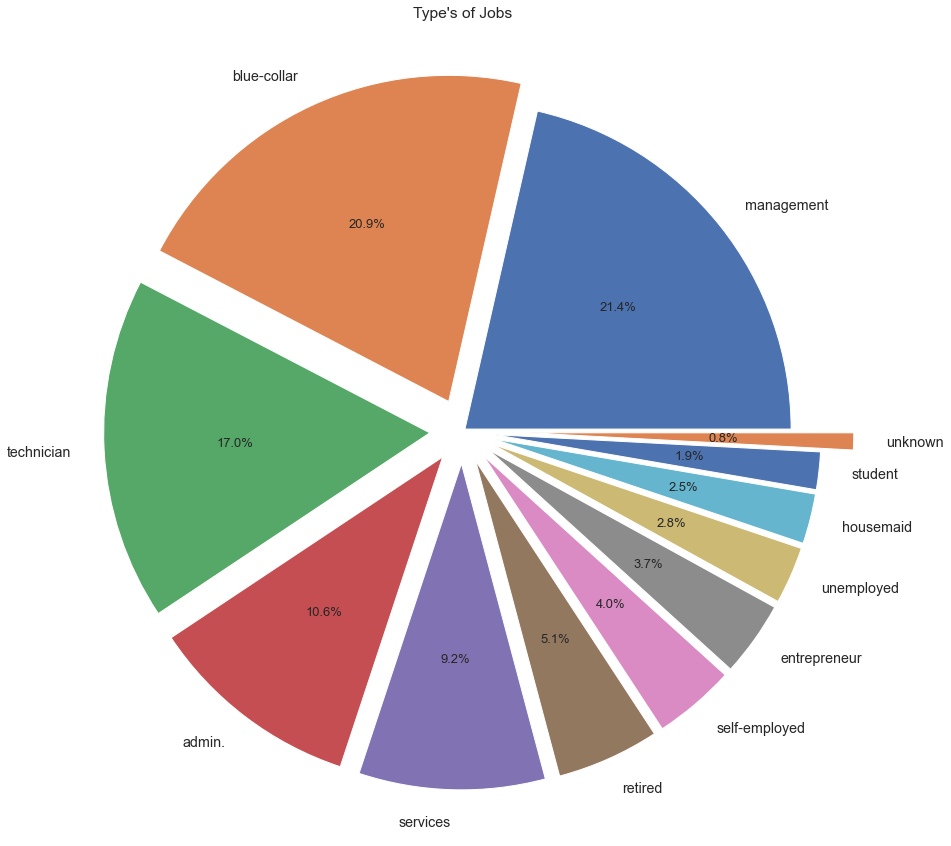

In [133]:
plt.clf() # clear plot data 
plt.figure(figsize=(20,15))
#---------------------------------------------------------------------------------------------------------------#
# DATA FOR PIE CHARTS: 
# 1) pie chart 1 data:

bankJobs = bank["job"].value_counts()          # slice mothers job data
bankJobs_list = bankJobs.index.tolist()                   # get the names for the labels from the index
bankJobs_values = bankJobs.values                         # to set values from the dataframe

#---------------------------------------------------------------------------------------------------------------#
# pie chart 1 visual settings: 
explode = (0.01,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2)  # to make space between chart elemnts  
sns.set(font_scale = 1.30)        # font size for labels and title
plt.rcParams['font.size'] = 13    # font size for %
plt.pie(bankJobs_values, 
        labels = bankJobs_list, 
        autopct = '%1.1f%%', 
        explode = explode) # loop through color dictionary and set color for labels in list
plt.title("Type's of Jobs")         # add title

#---------------------------------------------------------------------------------------------------------------#

#### <span style="color:#55BB99">Insights: </span>
1. We can see that the most popular jobs occurr in management and blue-collar, followed by technicians and then admins. 

<AxesSubplot:xlabel='marital', ylabel='Count'>

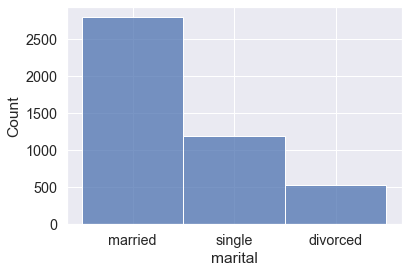

In [134]:
sns.histplot(data=bank, x="marital")

#### <span style="color:#55BB99">Insights: </span>
1. Most of the people in this dataset are married, then single but very little are divorced.  

In [135]:
sns.histplot(data=bank, x="age")

<AxesSubplot:xlabel='age', ylabel='Count'>

#### <span style="color:#55BB99">Insights: </span>
1. I wanted to see the distributions of age in this dataset, I can see that most of them are between 30 and 40. 

<AxesSubplot:xlabel='education', ylabel='Count'>

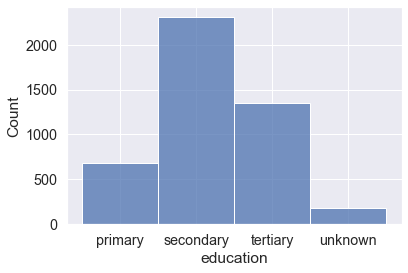

In [136]:
sns.histplot(data=bank, x="education")

#### <span style="color:#55BB99">Insights: </span>
1. Looking at the education levels we can see that most people have a secondary education followed by tertiary.

## <span style="color:#EF7C8E">2. Pollution random forest Regression: </span>

### <span style="color:#55BB99">2.1 Data Preprocessing: </span>

In [63]:
pollution = pd.read_csv('./data/pollution_us_2000_2016.csv')
pollution.head()

Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion  ...  Parts per billion  2.975000   
3  2000-01-01  Parts per billion  ...  Parts per billion  2.975000   
4  2000-01-02  Parts per billion  ...  Parts per billion  1.958333   

   SO2 1st Max Value  SO2 1st Max Hour SO2 AQI           CO Units   CO Mean  \
0                9.0                21    13.0  Parts per million  1.145833   
1                9.0                21    13.0  Parts per million  0.878947   
2                6.6                23     NaN  Parts per million  1.145833   
3                6.6                23     NaN  Parts per million  0.878947   
4                3.0                22     4.0  Parts per million  0.850000   

   CO 1st Max Value  CO 1st Max Hour CO AQI  
0               4.2               21    NaN  
1               2.2               23   25.0  
2               4.2               21    NaN  
3               2.2               23   25.0  
4               1.6               23    NaN  

[5 rows x 29 columns]

In [64]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [66]:
pollution=pollution[['NO2 Mean','NO2 1st Max Value','NO2 AQI',
          'O3 Mean','O3 1st Max Value','O3 AQI',
          'SO2 Mean','SO2 1st Max Value','SO2 AQI',
          'CO Mean','CO 1st Max Value','CO AQI']]

### <span style="color:#55BB99">2.2 Data Splitting and more Preprocessing: </span>

In [79]:
# Split the dataset 

train2, test2 = train_test_split(
    pollution,
    test_size=0.2,
    train_size = 0.8,
    random_state=42
)

In [86]:
# filling the NA's
train2=train2.fillna(method='ffill')
train2=train2.fillna(method='bfill')
test2=test2.fillna(method='ffill')
test2=test2.fillna(method='bfill')

In [93]:
X_train2 = train2.drop(columns = 'CO AQI')
y_train2 = train2['CO AQI']

X_test2 = test2.drop(columns = 'CO AQI')
y_test2 = test2['CO AQI']

print(X_train2.shape)
print(X_test2.shape)

(1397328, 11)
(349333, 11)


### <span style="color:#55BB99">2.3 Applying Random Tree Classification: </span>

In [95]:
# Create a logistic regression model to compare with the decision tree model

reg_log = LinearRegression()
reg_log.fit(X_train2, y_train2)

preds_log = reg_log.predict(X_test2)
mean_absolute_error(y_true=y_test2, y_pred=preds_log)

3.1477476803506055

In [96]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')
reg_forest.fit(X_train2, y_train2)

preds_forest = reg_log.predict(X_test2)
mean_absolute_error(y_true=y_test2, y_pred=preds_forest)

3.1477476803506055

### <span style="color:#55BB99">2.4 Results: </span>

In [98]:
# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [99]:
mse = mean_squared_error(y_true=y_test2, y_pred=preds_forest)
mae = mean_absolute_error(y_true=y_test2, y_pred=preds_forest)
rmse = mean_squared_error(y_true=y_test2, y_pred=preds_forest, squared=False)

In [103]:
print("The Random forest regression: ")
print("~~"*40)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("~~"*40)

The Random forest regression: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE: 26.579307806562056
MAE: 3.1477476803506055
RMSE: 5.1555123709057336
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### <span style="color:#55BB99">2.5 EDA: </span>

In [107]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397328 entries, 751162 to 121958
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   NO2 Mean           1397328 non-null  float64
 1   NO2 1st Max Value  1397328 non-null  float64
 2   NO2 AQI            1397328 non-null  int64  
 3   O3 Mean            1397328 non-null  float64
 4   O3 1st Max Value   1397328 non-null  float64
 5   O3 AQI             1397328 non-null  int64  
 6   SO2 Mean           1397328 non-null  float64
 7   SO2 1st Max Value  1397328 non-null  float64
 8   SO2 AQI            1397328 non-null  float64
 9   CO Mean            1397328 non-null  float64
 10  CO 1st Max Value   1397328 non-null  float64
 11  CO AQI             1397328 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 138.6 MB


In [111]:
plt.title("Distributions of NO2")
sns.kdeplot(x=train2['NO2 Mean'],label='NO2 Mean',shade=True,alpha=.4)

<AxesSubplot:title={'center':'Distributions of NO2'}, xlabel='NO2 Mean', ylabel='Density'>

In [110]:
plt.title("Distributions of CO2")
sns.kdeplot(x=train2['CO Mean'],label='CO Mean',shade=True,alpha=.4)

<AxesSubplot:xlabel='CO Mean', ylabel='Density'>

<AxesSubplot:title={'center':'Distributions of SO2'}, xlabel='SO2 Mean', ylabel='Density'>

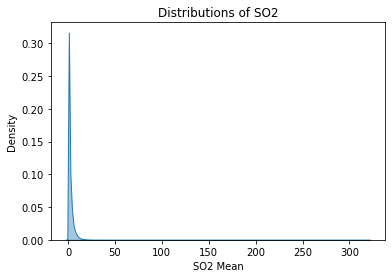

In [112]:
plt.title("Distributions of SO2")
sns.kdeplot(x=train2['SO2 Mean'],label='SO2 Mean',shade=True,alpha=.4)

In [113]:
plt.title("Distributions of O3")
sns.kdeplot(x=train2['O3 Mean'],label='O3 Mean',shade=True,alpha=.4)

<AxesSubplot:title={'center':'Distributions of O3'}, xlabel='O3 Mean', ylabel='Density'>

#### <span style="color:#55BB99">Insights: </span>
1. I noticed the distribution on the X axis for the SO2 and NO2 have very high numbers ranging from 0 to 300 and 0 to 140 respectively, however the O3 and the CO2 have a smaller range of distribution. 
1. The SO2 spikes at the start of 0 to maybe 10 and then stays steady. 

<AxesSubplot:xlabel='NO2 1st Max Value', ylabel='Count'>

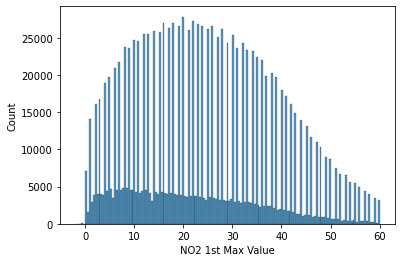

In [123]:
sns.histplot(data=train2, x=train2.loc[(train2['NO2 1st Max Value'] <=60), 'NO2 1st Max Value'])

<AxesSubplot:xlabel='NO2 AQI', ylabel='Count'>

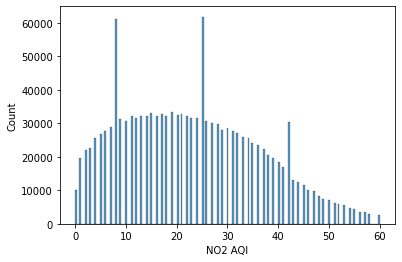

In [126]:
sns.histplot(data=train2, x=train2.loc[(train2['NO2 AQI'] <=60), 'NO2 AQI'])

In [127]:
sns.histplot(data=train2, x=train2.loc[(train2['NO2 Mean'] <=60), 'NO2 Mean'])

<AxesSubplot:xlabel='NO2 Mean', ylabel='Count'>

#### <span style="color:#55BB99">Insights: </span>
1. I wanted to look into the NO2 values in a histplot and noticed they all start getting very low after 60. 